In [63]:
import gym
import gridworld
import random
import torch
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from DQN_agent import Agent

## Initialize the environment (LunarLander-v2) and the agent

In [4]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


In [5]:
agent = Agent(state_size=8, action_size=4, seed=0)

## Train the agent with DQN (Experience Replay + Target Network) (LunarLander-v2)

Episode 100	Average Score: -203.18
Episode 200	Average Score: -121.23
Episode 300	Average Score: -55.393
Episode 400	Average Score: -12.05
Episode 500	Average Score: 41.702
Episode 600	Average Score: 84.14
Episode 700	Average Score: 142.01
Episode 800	Average Score: 173.82
Episode 900	Average Score: 164.89
Episode 1000	Average Score: 153.46
Episode 1100	Average Score: 184.06
Episode 1200	Average Score: 172.37
Episode 1300	Average Score: 204.83
Episode 1400	Average Score: 209.92
Episode 1500	Average Score: 221.69
Episode 1600	Average Score: 233.74
Episode 1700	Average Score: 225.04
Episode 1800	Average Score: 228.62
Episode 1900	Average Score: 230.07
Episode 2000	Average Score: 234.70


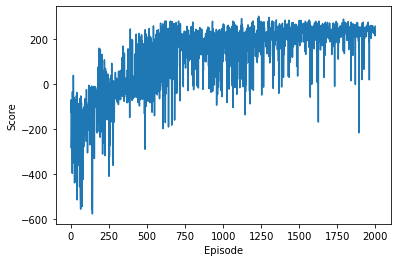

In [6]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Train the agent with DQN.
       n_episodes: maximum number of training episodes
       max_t: maximum number of timesteps per episode
       eps_start: starting value of epsilon, for epsilon-greedy action selection
       eps_end: minimum value of epsilon
       eps_decay: multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

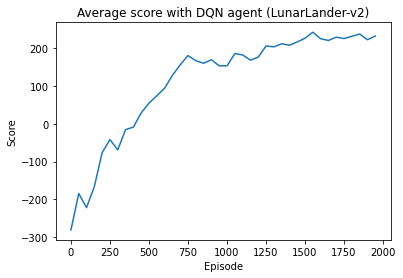

In [9]:
rplot = []
rplot.append(scores[0])
for e in range(2000):
    if (e % 50 == 0) and (e>49):
        rplot.append(sum(scores[e-50:e])/50)

plt.figure()
plt.plot(np.arange(0, 2000, 50), rplot)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Average score with DQN agent (LunarLander-v2)')
plt.show()


In [13]:
env.close()

## Initialize the environment (CartPole-v1) and the agent

In [45]:
env = gym.make('CartPole-v1')
env.seed(5)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (4,)
Number of actions:  2


In [46]:
agent = Agent(state_size=4, action_size=2, seed=5)

## Train the agent with DQN (Experience Replay + Target Network) (CartPole-v1)

Episode 100	Average Score: 20.11
Episode 200	Average Score: 12.97
Episode 300	Average Score: 10.85
Episode 400	Average Score: 10.14
Episode 500	Average Score: 9.690
Episode 600	Average Score: 9.69
Episode 700	Average Score: 9.76
Episode 800	Average Score: 10.44
Episode 900	Average Score: 12.22
Episode 1000	Average Score: 17.89
Episode 1100	Average Score: 95.73
Episode 1200	Average Score: 163.97
Episode 1300	Average Score: 169.34
Episode 1400	Average Score: 169.86
Episode 1500	Average Score: 174.98
Episode 1600	Average Score: 170.16
Episode 1700	Average Score: 173.45


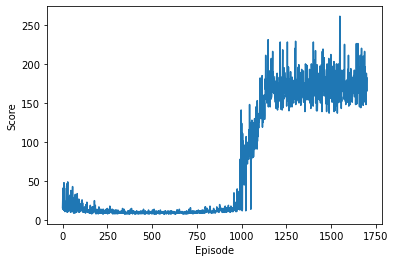

In [47]:
def dqn(n_episodes=1700, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Train the agent with DQN.
       n_episodes: maximum number of training episodes
       max_t: maximum number of timesteps per episode
       eps_start: starting value of epsilon, for epsilon-greedy action selection
       eps_end: minimum value of epsilon
       eps_decay: multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

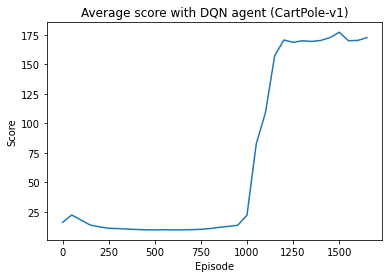

In [48]:
rplot = []
rplot.append(scores[0])
for e in range(1700):
    if (e % 50 == 0) and (e>49):
        rplot.append(sum(scores[e-50:e])/50)

plt.figure()
plt.plot(np.arange(0, 1700, 50), rplot)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Average score with DQN agent (CartPole-v1)')
plt.show()

In [61]:
env.close()

## Initialize the environment (gridworld-v0) and the agent

In [64]:
env = gym.make('gridworld-v0')
env.setPlan("gridworldPlans/plan0.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})
env.seed(5)

print(env.action_space)  # les actions possibles
print(env.step(1))  # faire action 1 et retourne l'observation, le reward, et un done un booleen (jeu fini ou pas)
statedic, mdp = env.getMDP()  # recupere le mdp : statedic
print(f"Nombre d'etats : {len(statedic)}")  # nombre d'etats ,statedic : etat-> numero de l'etat
state, transitions = list(mdp.items())[0]
print(state)  # un etat du mdp
print(transitions)  # dictionnaire des transitions pour l'etat :  {action-> [proba,etat,reward,done]}

print('Number of actions: ', env.action_space.n)

Discrete(4)
(array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 3, 1],
       [1, 0, 1, 0, 2, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]), -1, True, {})
Nombre d'etats : 11
[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
{0: [(0.8, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -0.001, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -0.001, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 2, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -0.001, False)], 1: [(0.8, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 2, 1], [1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -1, True), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0

In [65]:
agent = Agent(state_size=36, action_size=4, seed=5)

## Train the agent with DQN (Experience Replay + Target Network) (gridworld-v0)

Episode 100	Average Score: -0.79
Episode 200	Average Score: -0.75
Episode 300	Average Score: -0.91
Episode 400	Average Score: -0.75
Episode 500	Average Score: -0.77
Episode 600	Average Score: -0.79
Episode 700	Average Score: -0.85
Episode 800	Average Score: -0.91
Episode 900	Average Score: -0.97
Episode 1000	Average Score: -0.87
Episode 1100	Average Score: -0.85
Episode 1200	Average Score: -0.85
Episode 1300	Average Score: -0.91
Episode 1400	Average Score: -0.91
Episode 1500	Average Score: -1.01
Episode 1600	Average Score: -0.93
Episode 1700	Average Score: -0.91
Episode 1800	Average Score: -0.87
Episode 1900	Average Score: -0.75
Episode 2000	Average Score: -0.75
Episode 2100	Average Score: -0.73
Episode 2200	Average Score: -0.72
Episode 2300	Average Score: -0.59
Episode 2400	Average Score: -0.58
Episode 2500	Average Score: -0.81
Episode 2600	Average Score: -0.83
Episode 2700	Average Score: -0.95
Episode 2800	Average Score: -0.85
Episode 2900	Average Score: -0.85
Episode 3000	Average Sc

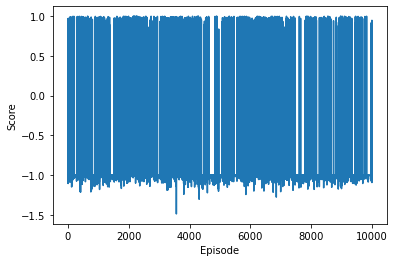

In [67]:
def dqn(n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Train the agent with DQN.
       n_episodes: maximum number of training episodes
       max_t: maximum number of timesteps per episode
       eps_start: starting value of epsilon, for epsilon-greedy action selection
       eps_end: minimum value of epsilon
       eps_decay: multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state.flatten(), eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state.flatten(), action, reward, next_state.flatten(), done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

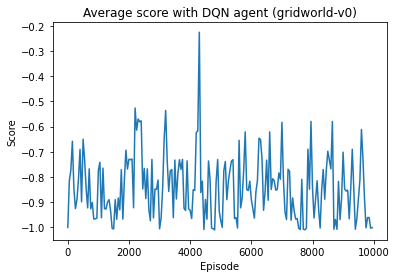

In [68]:
rplot = []
rplot.append(scores[0])
for e in range(10000):
    if (e % 50 == 0) and (e>49):
        rplot.append(sum(scores[e-50:e])/50)

plt.figure()
plt.plot(np.arange(0, 10000, 50), rplot)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Average score with DQN agent (gridworld-v0)')
plt.show()

In [69]:
env.close()